In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/home/guha/Ecommerce.csv')

In [2]:
df.columns


Index(['Email', 'Address', 'Avatar', 'Avg Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent',
       'Churned'],
      dtype='object')

In [3]:
def missing_values_table(df):
     
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_type = df.dtypes
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'type'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)      
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
    return mis_val_table_ren_columns

In [4]:
def plot_var(col_name, full_name, continuous):

    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
   
    if continuous:  
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    if continuous:
        sns.boxplot(x=col_name, y='Churned', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name)
    else:
        Charged_Off_rates = df.groupby(col_name)['ch'].value_counts(normalize=True)[:,1]
        sns.barplot(x=Charged_Off_rates.index, y=Charged_Off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction churned')
        ax2.set_title('churned Rate ' )
        ax2.set_xlabel(full_name)
    
    if continuous:  
        facet = sns.FacetGrid(df, hue = 'Churned', size=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(12,3))
        sns.countplot(x=col_name, hue='Churned', data=df, order=sorted(df[col_name].unique()) )
     
    plt.tight_layout()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg Session Length    500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
 8   Churned               500 non-null    object 
dtypes: float64(5), object(4)
memory usage: 35.3+ KB


In [6]:
missing_values_table(df)

Your selected dataframe has 9 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,type


In [7]:
df.sample(5)

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Churned
140,thomasgeorge@gonzalez-grant.com,"93306 Donald GreensNew Christopherbury, SC 59447",FloralWhite,31.066218,11.735095,36.599374,3.958892,448.933293,Yes
263,keith13@yahoo.com,"81830 Katie SquaresPort Austinland, FL 73522-0761",LightGoldenRodYellow,33.296982,12.491059,38.238941,2.709527,484.519809,No
422,robin80@yahoo.com,"928 Bailey RoadEast Mary, DE 11678-5634",Turquoise,33.894570,13.300299,36.393684,4.490002,630.156728,No
438,rileyalejandro@gmail.com,Unit 1475 Box 4215DPO AE 39546-5591,LightSteelBlue,32.149061,10.047315,37.181447,3.535088,392.992256,Yes
136,dawnlewis@watkins.org,"623 Erica FlatLake Josephland, MT 73514",Crimson,32.686129,12.215252,36.594362,3.897116,529.230090,No


In [8]:
df['Churned'][300]

'No'

In [9]:
df['Churned'] = df['Churned'].map(lambda x: x.strip())

In [10]:
df.sample(5)

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Churned
8,vchurch@walter-martinez.com,"860 Lee KeyWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409,No
303,brandon77@richardson.com,"109 Jessica ManorNorth Patriciashire, PR 84726",GhostWhite,30.816201,11.851399,36.925043,1.084585,266.086341,Yes
452,dbrown@gmail.com,"76666 Kathy LocksPort Susan, ME 64335",Indigo,33.552108,11.120871,36.808376,4.027814,521.195311,No
369,david80@knight.com,"368 Morris Ports Apt. 735New Lisaville, GA 342...",MediumAquaMarine,34.357196,9.477778,37.906015,5.047023,531.961551,No
99,jacqueline46@mcdonald-smith.biz,"3794 Michael Forest Apt. 750New Stephenberg, M...",Gray,33.826352,12.084092,35.890358,3.021672,495.299442,No


In [11]:
df.Churned.value_counts(normalize=True)


No     0.688
Yes    0.312
Name: Churned, dtype: float64

In [12]:
df.groupby('Avg Session Length')['Churned'].value_counts(normalize=True).loc[:,'Yes']

Avg Session Length
29.532429    1.0
30.393185    1.0
30.492537    1.0
30.574364    1.0
30.816201    1.0
            ... 
34.558295    1.0
34.594021    1.0
34.606242    1.0
34.729080    1.0
35.037450    1.0
Name: Churned, Length: 156, dtype: float64

In [13]:
df.groupby('Churned').mean()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Churned,,,,,
No,33.206664,12.280996,37.076482,3.927033,537.006912
Yes,32.714772,11.548598,37.025083,2.665585,416.196420


In [14]:
from scipy.stats import ks_2samp
def run_KS_test(feature):
    dist1 = df.loc[df.Churned == 'No',feature]
    dist2 = df.loc[df.Churned == 'Yes',feature]
    print(feature+':')
    print(ks_2samp(dist1,dist2),'\n')

In [15]:
ks_list = ['Email', 'Address', 'Avatar','Avg Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent']

In [16]:
for ks_element in ks_list:
    run_KS_test(ks_element)

Email:
Ks_2sampResult(statistic=0.08117173524150269, pvalue=0.4501059092908297) 

Address:
Ks_2sampResult(statistic=0.07267441860465117, pvalue=0.5902101493010372) 

Avatar:
Ks_2sampResult(statistic=0.046735241502683364, pvalue=0.9621531856995452) 

Avg Session Length:
Ks_2sampResult(statistic=0.20781156827668457, pvalue=0.00015088444299382608) 

Time on App:
Ks_2sampResult(statistic=0.3597197376267144, pvalue=7.086553566182374e-13) 

Time on Website:
Ks_2sampResult(statistic=0.07170542635658915, pvalue=0.6071604772271393) 

Length of Membership:
Ks_2sampResult(statistic=0.5628354203935599, pvalue=9.992007221626409e-16) 

Yearly Amount Spent:
Ks_2sampResult(statistic=0.8473464519976148, pvalue=9.992007221626409e-16) 



In [17]:
ks_list = ['Avg Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent']

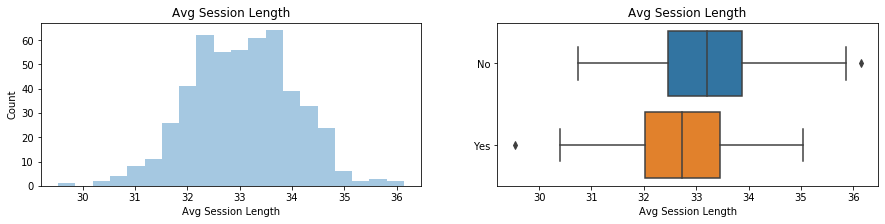

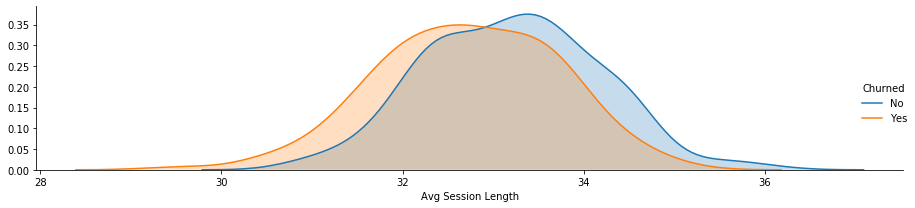

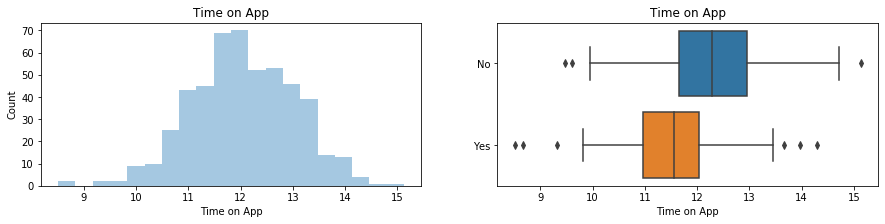

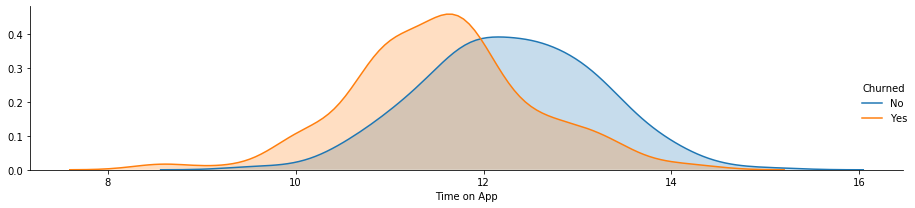

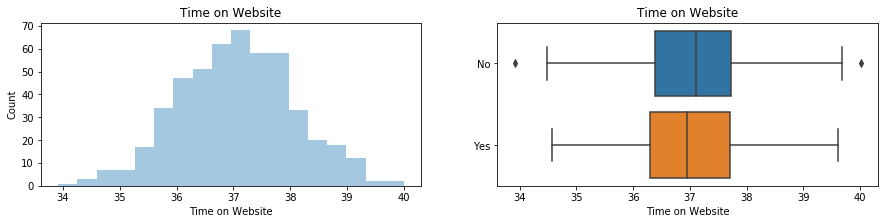

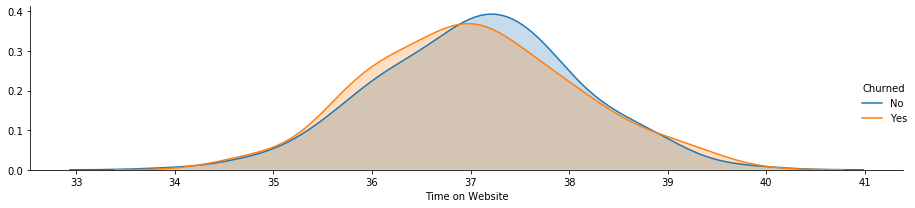

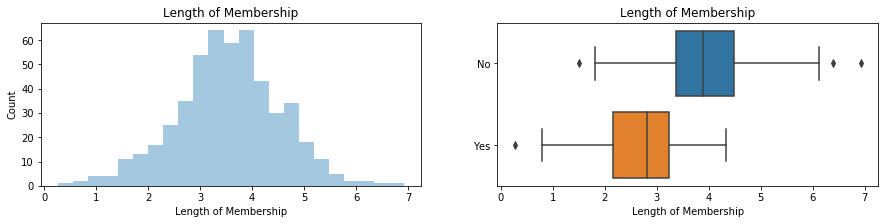

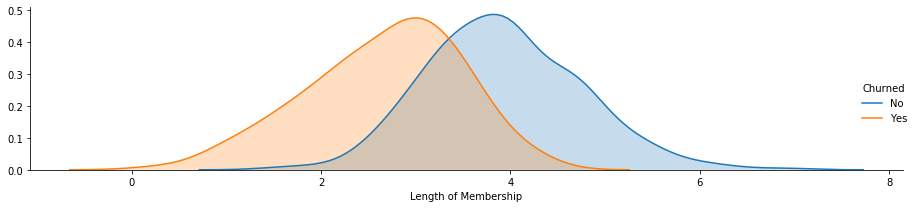

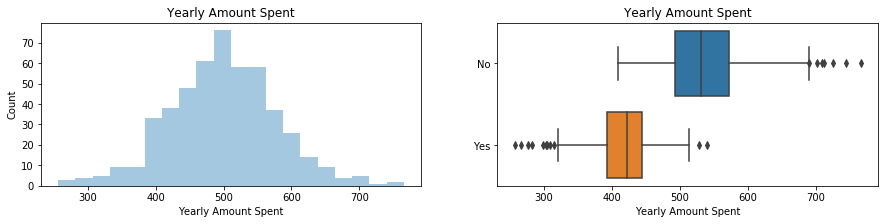

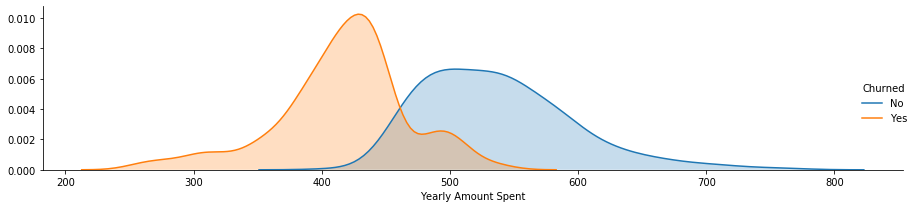

In [18]:
for plot_element in ks_list:
    plot_var(plot_element, plot_element, continuous=True)

In [19]:
#Linear Correlation
df.churned = df.Churned.map({'No':0, 'Yes':1})

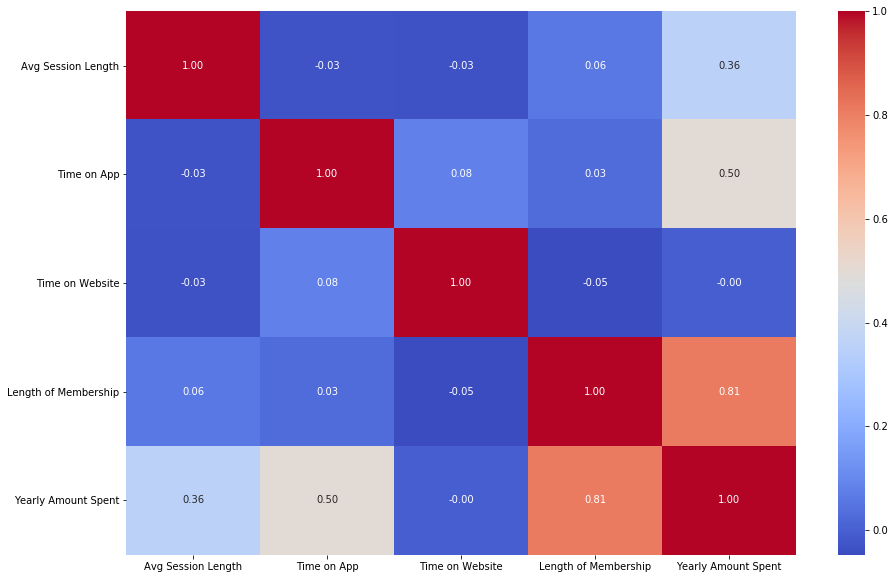

In [20]:
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
cm_df = sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm", ax=ax)

In [21]:
from scipy.stats import pearsonr
print(pearsonr(df['Yearly Amount Spent'],df['Length of Membership'])[0])

0.8090835682495683


In [22]:
df.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Churned
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,No
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,Yes
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,No
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,No
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,No


In [26]:
drop_list = ['Email','Address','Avatar','Time on App','Time on Website','Churned']

In [27]:
X = df.drop(drop_list, axis=1)
y = df.Churned.values

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X.sample(5)

,Avg Session Length,Length of Membership,Yearly Amount Spent
223,34.814984,4.389455,604.334840
451,33.943119,2.402454,436.720556
430,33.749228,4.595523,556.186369
211,34.081646,3.974522,548.518529
375,33.582947,2.479340,478.951405


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test.values), columns=X.columns)

print("Feature space holds %d observations and %d features" % X_train.shape)
print("Unique target labels:", np.unique(y_train))

Feature space holds 400 observations and 3 features
Unique target labels: ['No' 'Yes']


In [31]:
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from xgboost import  XGBClassifier

In [32]:
kfold = StratifiedKFold(n_splits=5)

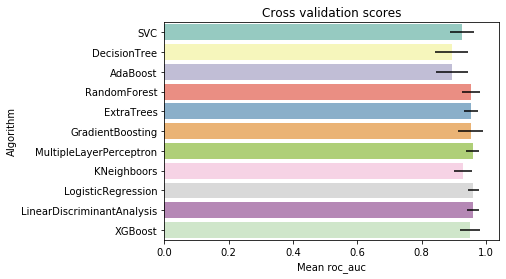

In [33]:
# Test differents algorithms 
random_state = 42
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier(random_state=random_state))


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "roc_auc", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGBoost"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean roc_auc")
g = g.set_title("Cross validation scores")


In [34]:
svm = SVC(probability=True)
svm_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

grid_svm = GridSearchCV(svm, param_grid = svm_param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_svm.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   14.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 200, 300, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [35]:
svm_best = grid_svm.best_estimator_
print('Best Score:', grid_svm.best_score_)
print('Best parameters set: \n', grid_svm.best_params_)

Best Score: 0.9626450142450143
Best parameters set: 
 {'C': 300, 'gamma': 0.001, 'kernel': 'rbf'}


In [36]:
y_pred_svm = svm_best.predict(X_test)
y_prob_svm = svm_best.predict_proba(X_test)[:,1]

In [37]:
rf = RandomForestClassifier(n_estimators=20, criterion="entropy", random_state=42)
svm_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}
rf_param_grid = {
    "max_features": range(2,7),
    "min_samples_split": range(4,10),
    "min_samples_leaf": range(1,6),
}

grid_rf = GridSearchCV(rf, param_grid = rf_param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  1.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=20, n_jobs

In [38]:
rf_best = grid_rf.best_estimator_
print('Best Score:', grid_rf.best_score_)
print('Best parameters set: \n', grid_rf.best_params_)

Best Score: 0.9609476301476303
Best parameters set: 
 {'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 9}


In [39]:
y_pred_rf = rf_best.predict(X_test)
y_prob_rf = rf_best.predict_proba(X_test)[:,1]

In [40]:
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors':[4,8,16],
    'weights': ['uniform','distance']
}

grid_knn = GridSearchCV(knn, param_grid = knn_param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1, verbose = 1)
grid_knn.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [4, 8, 16],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [41]:
knn_best = grid_knn.best_estimator_
print('Best Score:', grid_knn.best_score_)
print('Best parameters set: \n', grid_knn.best_params_)

Best Score: 0.9555255115255115
Best parameters set: 
 {'n_neighbors': 16, 'weights': 'distance'}


In [42]:
y_pred_knn = knn_best.predict(X_test)
y_prob_knn = knn_best.predict_proba(X_test)[:,1]

In [43]:
lr = LogisticRegression()
C_grid = 0.001*10**(np.arange(0,1.01,0.01)*3)
lr_param_grid  = {
    'penalty': ['l1', 'l2'], 
    'C': C_grid
}

grid_lr = GridSearchCV(lr, lr_param_grid, scoring='roc_auc')
grid_lr.fit(X_train, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.001     , 0.0010715...
       0.17782794, 0.19054607, 0.20417379, 0.21877616, 0.23442288,
       0.25118864, 0.26915348, 0.28840315, 0.30902954, 0.33113112,
       0.35481339, 0.3801894 , 0.40738028, 0.43651583, 0.46773514,
       0.50118723, 0.5370318 , 0.57543994, 0.616595  , 0.66069345,
       0.70794578, 

In [44]:
lr_best = grid_lr.best_estimator_
print('Best Score:', grid_lr.best_score_)
print('Best parameters set: \n', grid_lr.best_params_)

Best Score: 0.9616298368298368
Best parameters set: 
 {'C': 0.9332543007969906, 'penalty': 'l2'}


In [48]:
y_pred_lr = lr_best.predict(X_test)
y_prob_lr = lr_best.predict_proba(X_test)[:,1]

In [50]:
LRmodel_l2 = LogisticRegression(penalty="l2")
LRmodel_l2.fit(X_train, y_train)
LRmodel_l2.coef_[0]
print("Logistic Regression (L2) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l2.coef_[0]), \
                      X_train.columns), key=lambda kv:(-abs(kv[0]),kv[1
])):
    print(v + ": " + str(k))

Logistic Regression (L2) Coefficients
Yearly Amount Spent: -3.5892
Length of Membership: -0.6173
Avg Session Length: -0.2066


In [51]:
from sklearn.feature_selection import RFE
rfe_l2 = RFE(LRmodel_l2, n_features_to_select=1)
rfe_l2.fit(X_train, y_train)
print("Logistic Regression (L2) RFE Result")
for k,v in sorted(zip(map(lambda x: round(x, 4), rfe_l2.ranking_), X_train.columns)):
    print(v + ": " + str(k))

Logistic Regression (L2) RFE Result
Yearly Amount Spent: 1
Length of Membership: 2
Avg Session Length: 3


In [53]:
gb = GradientBoostingClassifier(random_state=random_state)
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

grid_gb = GridSearchCV(gb,param_grid = gb_param_grid, cv=kfold, scoring="roc_auc", n_jobs= 4, verbose = 1)

grid_gb.fit(X_train,y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   18.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:  1.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2...
                                                  subsample=1.0, tol=0.0001,
                                                  validation_fraction=0.1,
   

In [54]:
gb_best = grid_gb.best_estimator_
print('Best Score:', grid_gb.best_score_)
print('Best parameters set: \n', grid_gb.best_params_)

Best Score: 0.943841958041958
Best parameters set: 
 {'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 100, 'n_estimators': 200}


In [55]:
y_pred_gb = gb_best.predict(X_test)
y_prob_gb = gb_best.predict_proba(X_test)[:,1]

In [56]:
xgb = GradientBoostingClassifier(random_state=random_state)
xgb_param_grid = {
    'learning_rate': [0.025,0.05,0.1], 
    'max_depth': [3,4,5],
    'subsample': [0.25,0.5,1.0]
}
grid_xgb = GridSearchCV(xgb, param_grid = xgb_param_grid, cv=kfold, scoring="roc_auc", n_jobs= 4, verbose = 1)

grid_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.6s
[Parallel(n_jobs=4)]: Done 135 out of 135 | elapsed:   48.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2...
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
              

In [57]:
xgb_best = grid_xgb.best_estimator_
print('Best Score:', grid_xgb.best_score_)
print('Best parameters set: \n', grid_xgb.best_params_)

Best Score: 0.9580775964775965
Best parameters set: 
 {'learning_rate': 0.05, 'max_depth': 5, 'subsample': 0.5}


In [58]:
y_pred_xgb = xgb_best.predict(X_test)
y_prob_xgb = xgb_best.predict_proba(X_test)[:,1]

In [59]:
# print a summary of the scores
def print_grid_search_metrics(gs):
    print("Best score: %0.3f" % gs.best_score_)
    print("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

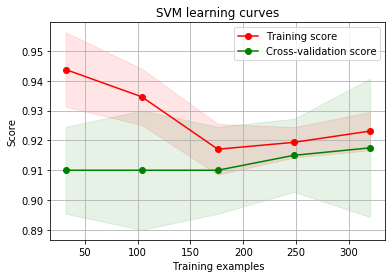

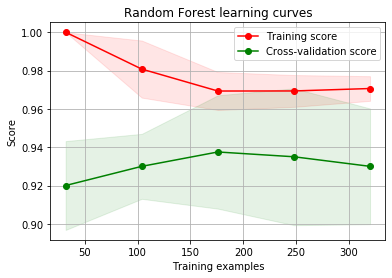

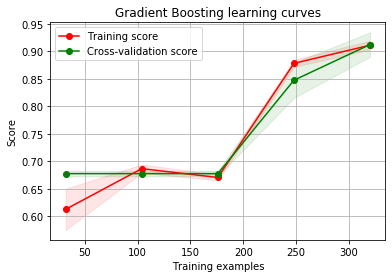

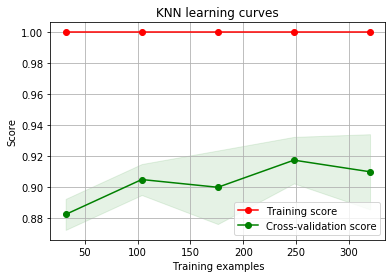

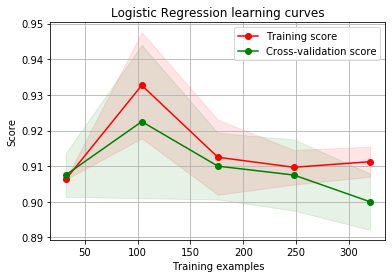

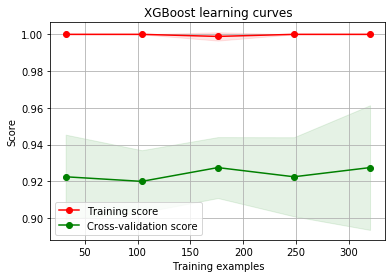

In [61]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
 
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(grid_svm.best_estimator_,"SVM learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_rf.best_estimator_,"Random Forest learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_gb.best_estimator_,"Gradient Boosting learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_knn.best_estimator_,"KNN learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_lr.best_estimator_,"Logistic Regression learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(grid_xgb.best_estimator_,"XGBoost learning curves",X_train,y_train,cv=kfold)

In [62]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score

def cal_evaluation(classifier, cm, auc):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    f1 = 2 * precision * recall / (precision + recall)
    print(classifier)
    print("Accuracy is " + str(accuracy))
    print("Precision is " + str(precision))
    print("Recall is " + str(recall))
    print("F1 score is " + str(f1))
    print("ROC AUC is " + str(auc))

def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for x in confusion_matrices:
        classifier, cm, auc = x[0], x[1], x[2]
        cal_evaluation(classifier, cm, auc)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for {}'.format(classifier))
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

['No' 'Yes']
Gradient Boosting
Accuracy is 0.96
Precision is 0.896551724137931
Recall is 0.9629629629629629
F1 score is 0.9285714285714286
ROC AUC is 0.9685438863521054


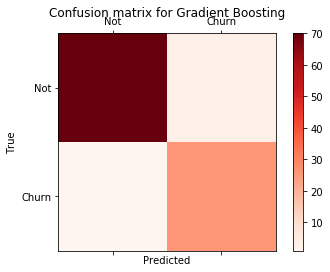

Logisitic Regression
Accuracy is 0.93
Precision is 0.8125
Recall is 0.9629629629629629
F1 score is 0.8813559322033898
ROC AUC is 0.9624556062912228


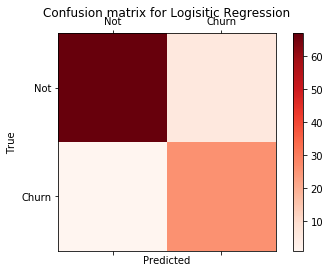

K-Nearest-Neighbors
Accuracy is 0.94
Precision is 0.8387096774193549
Recall is 0.9629629629629629
F1 score is 0.896551724137931
ROC AUC is 0.9596651445966514


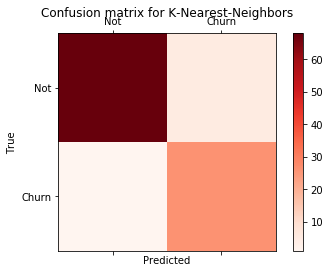

Random Forest
Accuracy is 0.96
Precision is 0.896551724137931
Recall is 0.9629629629629629
F1 score is 0.9285714285714286
ROC AUC is 0.9545915778792491


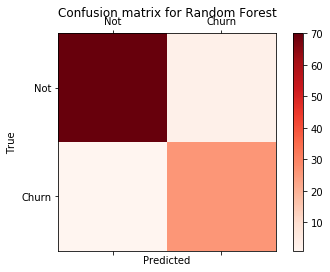

Support Vector Machine
Accuracy is 0.94
Precision is 0.8387096774193549
Recall is 0.9629629629629629
F1 score is 0.896551724137931
ROC AUC is 0.9619482496194823


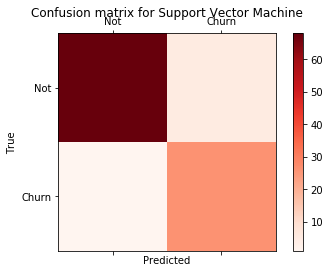

XGBoost Classifier
Accuracy is 0.95
Precision is 0.8666666666666667
Recall is 0.9629629629629629
F1 score is 0.912280701754386
ROC AUC is 0.963216641298833


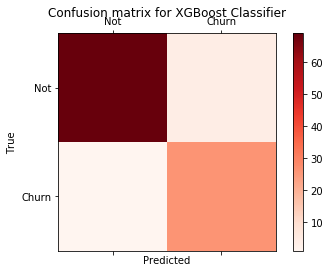

In [63]:
%matplotlib inline

y = np.array(y)
class_names = np.unique(y)
print(class_names)

confusion_matrices = [
    ("Gradient Boosting", confusion_matrix(y_test, y_pred_gb), roc_auc_score(y_test, y_prob_gb)),
    ("Logisitic Regression", confusion_matrix(y_test, y_pred_lr), roc_auc_score(y_test, y_prob_lr)),
    ("K-Nearest-Neighbors", confusion_matrix(y_test, y_pred_knn), roc_auc_score(y_test, y_prob_knn)),
    ("Random Forest", confusion_matrix(y_test, y_pred_rf), roc_auc_score(y_test, y_prob_rf)),
    ("Support Vector Machine", confusion_matrix(y_test, y_pred_svm), roc_auc_score(y_test, y_prob_svm)),
    ("XGBoost Classifier", confusion_matrix(y_test, y_pred_xgb), roc_auc_score(y_test, y_prob_xgb))
    
]

draw_confusion_matrices(confusion_matrices)

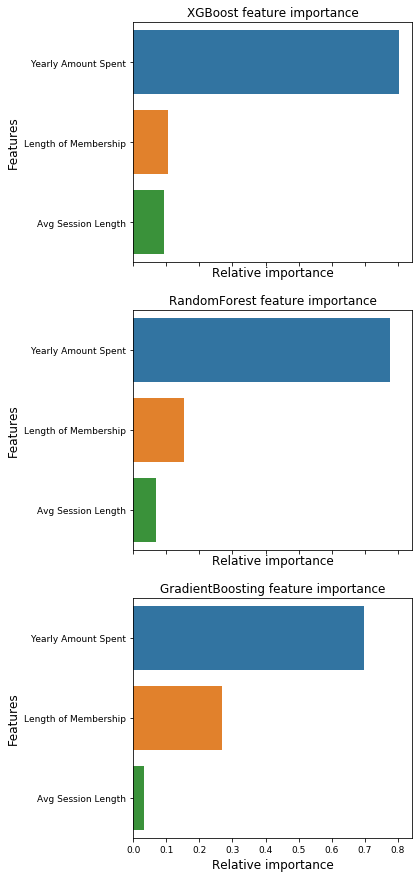

In [64]:
nrows = 3
ncols = 1
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(5,15))

names_classifiers = [("XGBoost", xgb_best),("RandomForest",rf_best),("GradientBoosting",gb_best),("GradientBoosting",gb_best)]

nclassifier = 0
for row in range(nrows):
    name = names_classifiers[nclassifier][0]
    classifier = names_classifiers[nclassifier][1]
    indices = np.argsort(classifier.feature_importances_)[::-1][:40]
    g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row])
    g.set_xlabel("Relative importance",fontsize=12)
    g.set_ylabel("Features",fontsize=12)
    g.tick_params(labelsize=9)
    g.set_title(name + " feature importance")
    nclassifier += 1

In [65]:
test_rf = pd.Series(rf_best.predict(X_test), name="Random Forest")
test_lr = pd.Series(lr_best.predict(X_test), name="Logistic Regression")
test_gb = pd.Series(gb_best.predict(X_test), name="Gradient Boosting")
test_knn = pd.Series(knn_best.predict(X_test), name="KNN")
test_svm = pd.Series(svm_best.predict(X_test), name="SVM")
test_xgb = pd.Series(xgb_best.predict(X_test), name="XGBoost")

frames=[test_rf, test_lr,test_gb,test_knn, test_svm, test_xgb]
ensemble_results = pd.concat(frames,axis=1)


In [66]:
ensemble_results

,Random Forest,Logistic Regression,Gradient Boosting,KNN,SVM,XGBoost
0,Yes,Yes,Yes,Yes,Yes,Yes
1,No,No,No,No,No,No
2,Yes,Yes,Yes,Yes,Yes,Yes
3,No,No,No,No,No,No
4,Yes,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...
95,No,No,No,No,No,No
96,No,No,No,No,No,No
97,No,No,No,No,No,No
98,Yes,Yes,Yes,Yes,Yes,Yes


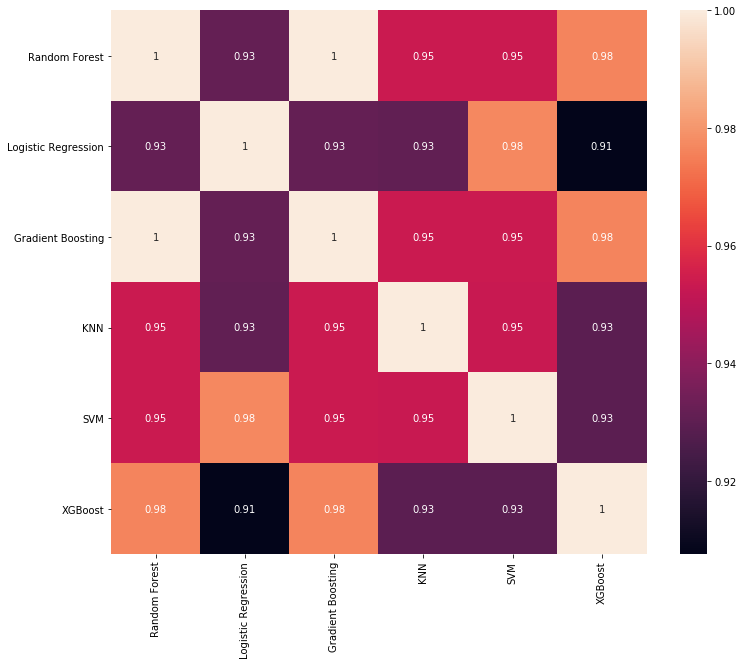

In [67]:
plt.figure(figsize=(12,10))
corr = ensemble_results.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, annot = True)

In [68]:
votingC = VotingClassifier(estimators=[('rf', rf_best), ('lr',lr_best),('knn', knn_best),
('svm', svm_best), ('gb',gb_best),('xgb',xgb_best)], voting='soft', n_jobs=4)
votingC = votingC.fit(X_train, y_train)

In [69]:
y_pred_voting = votingC.predict(X_test)
y_prob_voting = votingC.predict_proba(X_test)[:,1]

Ensemble modeling
Accuracy is 0.95
Precision is 0.8666666666666667
Recall is 0.9629629629629629
F1 score is 0.912280701754386
ROC AUC is 0.9644850329781837


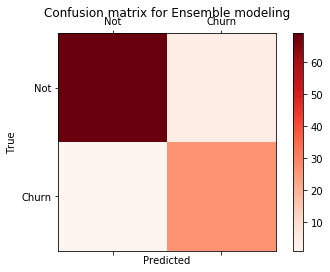

In [70]:
confusion_matrices = [
    ("Ensemble modeling", confusion_matrix(y_test, y_pred_voting), roc_auc_score(y_test, y_prob_voting))   
]
draw_confusion_matrices(confusion_matrices)